<a href="https://colab.research.google.com/github/diya-liza/Spam-detector/blob/master/Spam_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import random
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path='/content/drive/My Drive/Colab Notebooks/Spam detector/Dataset/spam.csv'
data= pd.read_csv(path, encoding='latin-1')
data.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'],axis=1,inplace=True)
data.rename(columns = {'v1':'label','v2':'message'}, inplace = True) 
data['label']=data['label'].apply(lambda x:0 if x=='ham' else 1)
print(data.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


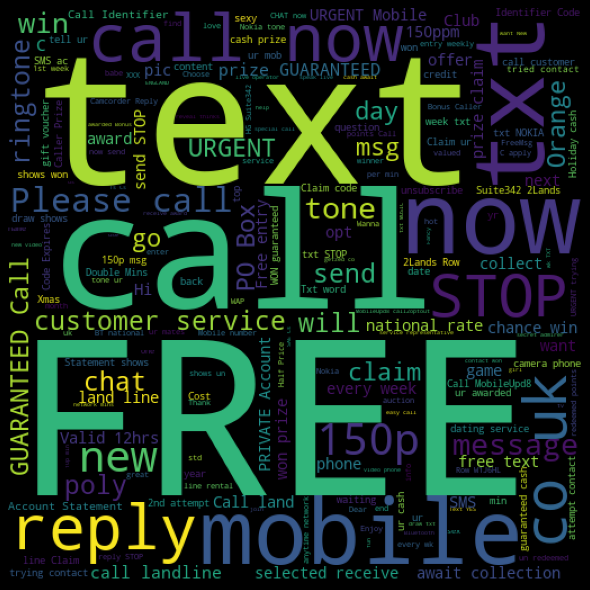

In [6]:
spam_words=' '.join(list(data[data['label']==1]['message']))
spam_wc=WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

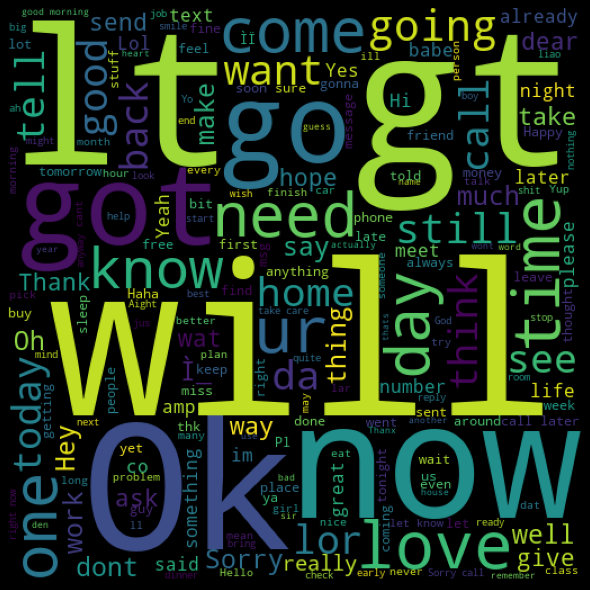

In [7]:
ham_words=' '.join(list(data[data['label']==0]['message']))
ham_wc=WordCloud(width=512,height=512).generate(ham_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
ps = PorterStemmer()
def preprocess(msg):
  msg=msg.lower()
  message = re.sub(pattern='[!@#$%^&*()]', repl=' ', string=msg)
  words=message.split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  return words






In [ ]:
data

In [ ]:
train, test = train_test_split(data, test_size=0.25)
